In [3]:
import pandas as pd
import numpy as np 
import os
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer , PorterStemmer
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import re
stop_words = stopwords.words('english') # defining stop_words
stop_words.remove('not') # removing not from the stop_words list as it contains value in negative movies
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
!tar xvzf aclImdb_v1.tar.gz

tar: Error opening archive: Failed to open 'aclImdb_v1.tar.gz'
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Loading and exploration of Data

In [4]:
def fetch_reviews(path):
  data = []
  #path = 'aclImdb/train/pos/'
  files = [f for f in os.listdir(path)]
  for file in files:
    with open(path+file, "r", encoding='utf8') as f:
      data.append(f.read())
      
  return data

In [5]:
df_train_pos=pd.DataFrame({"Review":fetch_reviews('downloads/aclImdb/train/pos/'),
                           'Label':1
                          })
df_train_neg=pd.DataFrame({"Review":fetch_reviews('downloads/aclImdb/train/neg/'),
                           'Label':0
                          })
df_test_pos=pd.DataFrame({"Review":fetch_reviews('downloads/aclImdb/test/pos/'),
                           'Label':1
                          })
df_test_neg=pd.DataFrame({"Review":fetch_reviews('downloads/aclImdb/test/neg/'),
                           'Label':0
                          })

df=pd.concat([df_train_pos,df_train_neg,df_test_pos,df_test_neg])

In [10]:
df.head(10)

,Review,Label
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1
5,"This isn't the comedic Robin Williams, nor is ...",1
6,Yes its an art... to successfully make a slow ...,1
7,"In this ""critically acclaimed psychological th...",1
8,THE NIGHT LISTENER (2006) **1/2 Robin Williams...,1
9,"You know, Robin Williams, God bless him, is co...",1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 12499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  50000 non-null  object
 1   Label   50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [12]:
df.describe

<bound method NDFrame.describe of                                                   Review  Label
0      Bromwell High is a cartoon comedy. It ran at t...      1
1      Homelessness (or Houselessness as George Carli...      1
2      Brilliant over-acting by Lesley Ann Warren. Be...      1
3      This is easily the most underrated film inn th...      1
4      This is not the typical Mel Brooks film. It wa...      1
...                                                  ...    ...
12495  I occasionally let my kids watch this garbage ...      0
12496  When all we have anymore is pretty much realit...      0
12497  The basic genre is a thriller intercut with an...      0
12498  Four things intrigued me as to this film - fir...      0
12499  David Bryce's comments nearby are exceptionall...      0

[50000 rows x 2 columns]>

# checking the nulls in the data 


In [14]:
df.isnull().sum() 

Review    0
Label     0
dtype: int64

# checking sampels of the negative reviews

In [17]:
label_0_samples = df[df['Label'] == 0].sample(n=10, random_state=42)
print("Samples when label = 0:")
print(label_0_samples)

Samples when label = 0:
                                                  Review  Label
6868   Silent Night, Deadly Night 5 is the very last ...      0
11516  The setup for "Nature of the Beast" is ingenio...      0
9668   For me, this movie just seemed to fall on its ...      0
1140   Extremely formulaic with cosmic-sized logic ho...      0
1518   I actually liked certain things about this gam...      0
7488   When I was a kid we always used to be babysat,...      0
5804   1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...      0
409    A severe backwards step for the puppets in thi...      0
3386   Skippy from "Family Ties" plays Eddie, a wussy...      0
9567   Mr Perlman gives a standout performance (as us...      0


# checking sampels of the positive reviews

In [18]:
label_1_samples = df[df['Label'] == 1].sample(n=10, random_state=42)

print("\nSamples when label = 1:")
print(label_1_samples)


Samples when label = 1:
                                                  Review  Label
6868   In Panic In The Streets Richard Widmark plays ...      1
11516  If you are like me and you bought the new Tena...      1
9668   I am a big fan a Faerie Tale Theatre and I've ...      1
1140   There are many things to admire about this fil...      1
1518   It was so very long ago (1960), but I have nev...      1
7488   This really is an incredible film. Not only do...      1
5804   If you lived through the 60s, this film can be...      1
409    As most other reviewers seem to agree, this ad...      1
3386   I'm 14 years old and I love this cartoon. Burt...      1
9567   This film would usually classify as the worst ...      1


# counts of the positive reviews

In [19]:
df[df['Label']==1].value_counts

<bound method DataFrame.value_counts of                                                   Review  Label
0      Bromwell High is a cartoon comedy. It ran at t...      1
1      Homelessness (or Houselessness as George Carli...      1
2      Brilliant over-acting by Lesley Ann Warren. Be...      1
3      This is easily the most underrated film inn th...      1
4      This is not the typical Mel Brooks film. It wa...      1
...                                                  ...    ...
12495  I was extraordinarily impressed by this film. ...      1
12496  Although I'm not a golf fan, I attended a snea...      1
12497  From the start of "The Edge Of Love", the view...      1
12498  This movie, with all its complexity and subtle...      1
12499  I've seen this story before but my kids haven'...      1

[25000 rows x 2 columns]>

# counts of the positive reviews

In [20]:
df[df['Label']==0].value_counts

<bound method DataFrame.value_counts of                                                   Review  Label
0      Story of a man who has unnatural feelings for ...      0
1      Airport '77 starts as a brand new luxury 747 p...      0
2      This film lacked something I couldn't put my f...      0
3      Sorry everyone,,, I know this is supposed to b...      0
4      When I was little my parents took me along to ...      0
...                                                  ...    ...
12495  I occasionally let my kids watch this garbage ...      0
12496  When all we have anymore is pretty much realit...      0
12497  The basic genre is a thriller intercut with an...      0
12498  Four things intrigued me as to this film - fir...      0
12499  David Bryce's comments nearby are exceptionall...      0

[25000 rows x 2 columns]>

In [21]:
df.head()

,Review,Label
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1


# Data preprocessing

In [22]:
def data_preprocessing(review):
    
  # data cleaning
  review = re.sub(re.compile('<.*?>'), '', review) #removing html tags
  review =  re.sub('[^A-Za-z0-9]+', ' ', review) #taking only words
  
  # lowercase
  review = review.lower()
  
  # tokenization
  tokens = nltk.word_tokenize(review) # converts review to tokens
  
  # stop_words removal
  review = [word for word in tokens if word not in stop_words] #removing stop words
  
  # lemmatization
  lemmatizer = WordNetLemmatizer()
  review = [lemmatizer.lemmatize(word) for word in review]
  
  # join words in preprocessed review
  review = ' '.join(review)

  return review

In [23]:
df['Preprocessed_Review']=df['Review'].apply(lambda Review: data_preprocessing(Review))

In [24]:
df.head(10)

,Review,Label,Preprocessed_Review
0,Bromwell High is a cartoon comedy. It ran at t...,1,bromwell high cartoon comedy ran time program ...
1,Homelessness (or Houselessness as George Carli...,1,homelessness houselessness george carlin state...
2,Brilliant over-acting by Lesley Ann Warren. Be...,1,brilliant acting lesley ann warren best dramat...
3,This is easily the most underrated film inn th...,1,easily underrated film inn brook cannon sure f...
4,This is not the typical Mel Brooks film. It wa...,1,not typical mel brook film much le slapstick m...
5,"This isn't the comedic Robin Williams, nor is ...",1,comedic robin williams quirky insane robin wil...
6,Yes its an art... to successfully make a slow ...,1,yes art successfully make slow paced thriller ...
7,"In this ""critically acclaimed psychological th...",1,critically acclaimed psychological thriller ba...
8,THE NIGHT LISTENER (2006) **1/2 Robin Williams...,1,night listener 2006 1 2 robin williams toni co...
9,"You know, Robin Williams, God bless him, is co...",1,know robin williams god bless constantly shoot...


# Positive Reviews Wordcloud

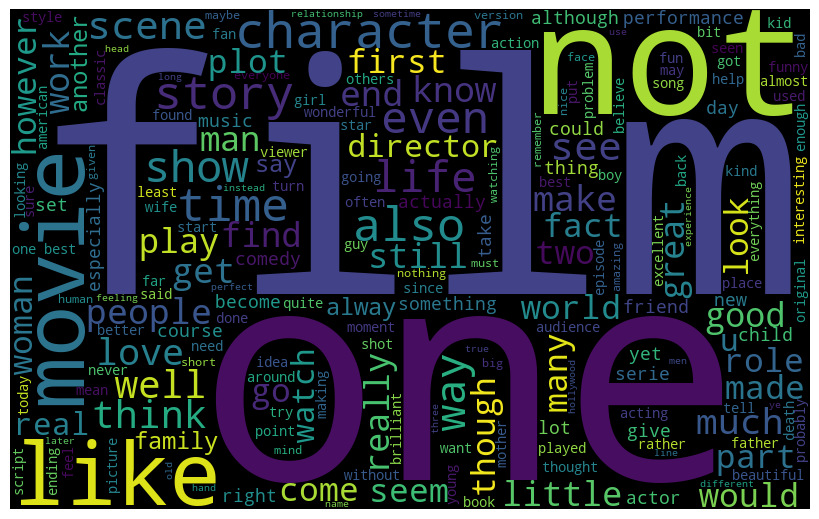

In [25]:
from wordcloud import WordCloud

words_list = df[df['Label']==1]['Preprocessed_Review'].unique().tolist()
pos_words = " ".join(words_list)

pos_wordcloud =  WordCloud(
                  width=800, height = 500,            
                  stopwords=stop_words).generate(pos_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Negative Reviews Wordcloud

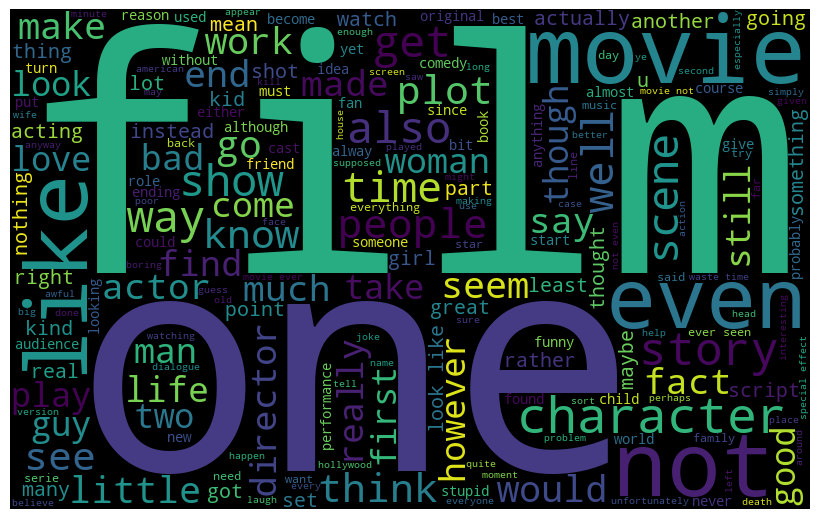

In [27]:
words_list=df[df['Label']==0]['Preprocessed_Review'].unique().tolist()
neg_words=" ".join(words_list)

neg_wordcloud= WordCloud(
                        width=800,
                         height=500,
                       stopwords=stop_words).generate(neg_words)

plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(neg_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# selecting the features and the labels

In [28]:
x=df['Review']

y=df['Label']


# Splitting the data set into train and test(80–20):

In [29]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

# Vectorizing Text (Reviews) (TF-IDF) 

In [30]:
tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [31]:
X_train_tfidf

<40000x92987 sparse matrix of type '<class 'numpy.float64'>'
	with 5456066 stored elements in Compressed Sparse Row format>

In [32]:
X_test_tfidf

<10000x92987 sparse matrix of type '<class 'numpy.float64'>'
	with 1360945 stored elements in Compressed Sparse Row format>

# Building ML Classifiers

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn import metrics

models = {
    "Decision Tree":DecisionTreeClassifier(random_state = 44, max_depth=20),
    "Logistic R.": LogisticRegression(random_state = 44),
    "Naive Bayes C":BernoulliNB(),
    "SVC":SVC(kernel='linear',max_iter=100,C=1.0,gamma='auto'),
    "Random Forest":RandomForestClassifier(random_state = 44, max_depth=20)
}
results = pd.DataFrame(columns=['Model','Recall TP/TP+FN','Precision TP/TP+FP','f1-score','accuracy TP+TN)/all'])
def Test_models(X_train,X_test,y_train,y_test):
    for model in models :
        fit=models[model].fit(X_train,y_train)
        fig,ax=plt.subplots(figsize=(7,7))
        ax.set_title(model)
        metrics.plot_confusion_matrix(fit,X_test,y_test,cmap='Blues',normalize='true',ax=ax)
       # metrics.plot_confusion_matrix(fit,X_train,y_train,cmap='Reds',normalize='true',ax=ax)
        plt.show()
        
        
        recall = round(metrics.recall_score(y_test, fit.predict(X_test))*100,2) # TP /(TP + FN)
        precision = round(metrics.precision_score(y_test, fit.predict(X_test))*100,2) # TP /(TP + FP)   
        f1 = round(metrics.f1_score(y_test, fit.predict(X_test))*100,2) # F1 = 2 * (precision * recall) / (precision + recall)
        accuracy = accuracy_score(y_test, fit.predict(X_test), normalize=True) # ((TP + TN)/(TP + TN + FP + FN))
        results.loc[len(results.index)] = [model, recall, precision, f1, accuracy]

# ConfusionMatrix for each ML Model

C:\Users\PC\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


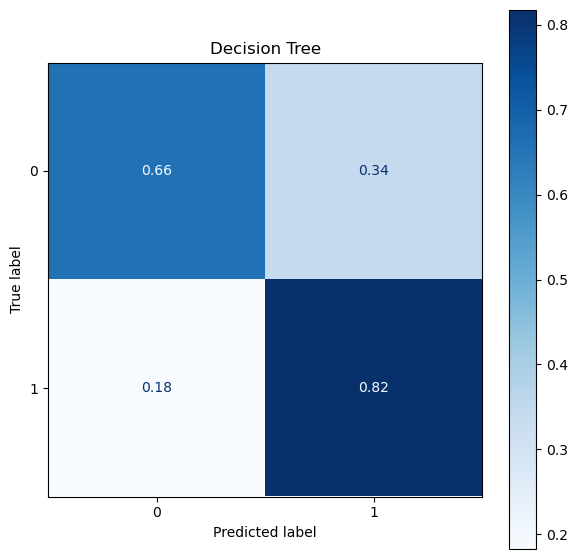

C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


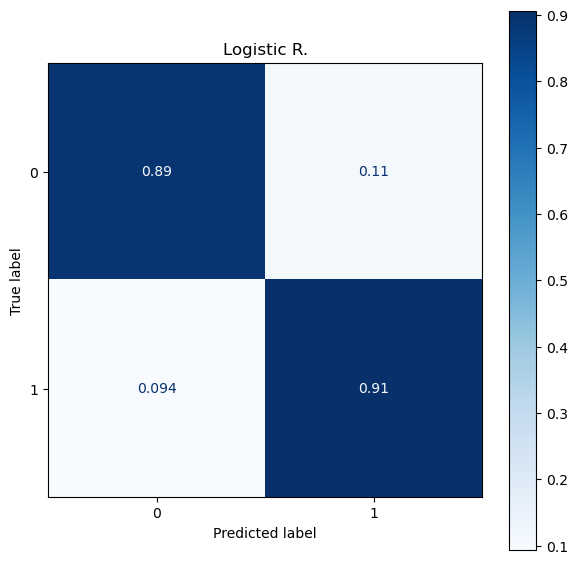

C:\Users\PC\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


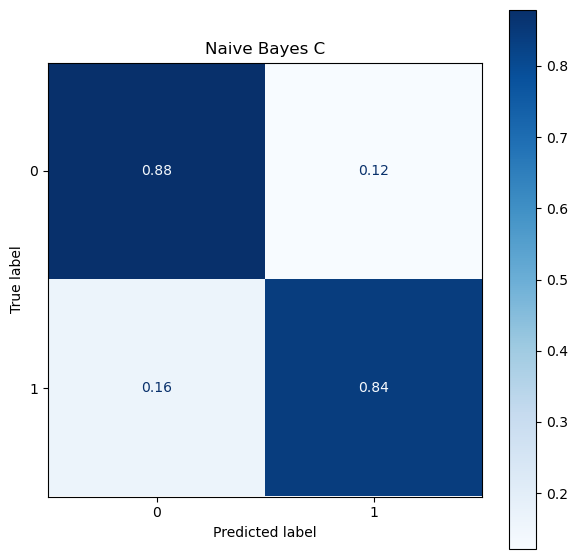

C:\Users\PC\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


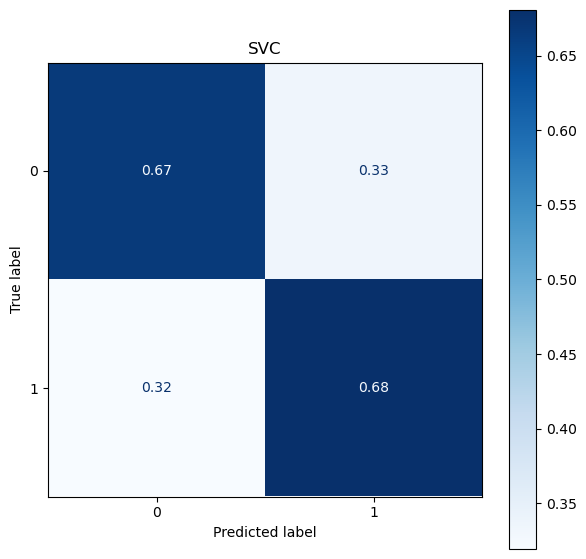

C:\Users\PC\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


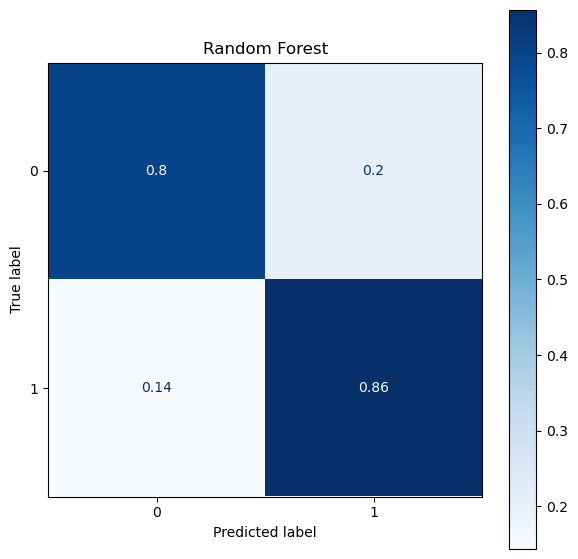

In [35]:
Test_models(X_train_tfidf, X_test_tfidf, y_train, y_test)

# Scores for each ML Model 

In [36]:
results.sort_values('accuracy TP+TN)/all', ascending=False)

,Model,Recall TP/TP+FN,Precision TP/TP+FP,f1-score,accuracy TP+TN)/all
1,Logistic R.,90.64,89.12,89.88,0.8979
2,Naive Bayes C,83.90,87.36,85.59,0.8588
4,Random Forest,85.68,80.97,83.26,0.8277
0,Decision Tree,81.72,70.52,75.71,0.7378
3,SVC,68.06,67.11,67.58,0.6735
